# **PROJECT 02 – STOCK PRICE PREDICTION USING JOINT ANALYSIS OF TEXT & STRUCTURED DATA IN PYTHON!**


## **Overview**

In this project, we will use Python to develop a predictive model that relies on both textual data and numerical data. In comparison to performing data mining with just one type of data, in many real-world scenarios it is often possible to gain greater insights or make better predictions by jointly mining both text and non-text data. We will gain direct experience with these concepts in this project by first performing sentiment analysis on a large collection of tweets about a publicly traded company. We will then combine the results of our sentiment analysis activities with a set of numerical data relating to the company’s stock price. Finally, We will use our combined dataset to train one or more machine learning models with the goal of predicting what the company’s stock price will be at the end of the next trading day.

## **Objective**
As noted previously, our primary goal in this project is to predict the company’s stock price when the market closes on the next trading day. 

## **Background**

Being able to predict the company’s stock price when the market closes on the next trading day accurately would obviously have a great deal of value for any individual or organization that wishes to make money in the stock market, since this information could be used to determine whether to buy, hold, or sell a stock on the current trading day. 

## **Project**

###**Data**

The data for this project have been provided in the form of an Excel file. This file consists of two spreadshThe columns contained in the first spreadsheet are:
1. day – A number indicating the trading day.
2. open_price – The price of the company’s stock when the market opened on the current trading day.
3. high_price – The maximum price of the company’s stock during the current trading day.
4. low_price – The minimum price of the company’s stock during the current trading day.
5. moving_average_5_day – The average of the company’s stock price over the previous 5 trading days.
6. moving_average_10_day – The average of the company’s stock price over the previous 10 trading days.
7. moving_average_50_day – The average of the company’s stock price over the previous 50 trading days.
8. moving_average_200_day – The average of the company’s stock price over the previous 200 trading days.
9. volume – The total number of shares of the company’s stock that were traded during the current trading day.
10. next_day_close_price – The price of the company’s stock when the market closed on the next trading day immediately following the current trading day. This is the primary dependent variable.


The columns contained in the second spreadsheet are:
11. day – A number indicating the trading day on which the current tweet was posted to Twitter.
12. tweet – The text of the current tweet.

Closing prices for the next trading day have been provided in the next_day_close_price column in the first spreadsheet. Although this spreadsheet contains data for 1,300 trading days, we have the next day’s closing price for only the first 1,000 of these trading days. We will need to use the 1,000 trading days for which we have complete data to train a machine learning model that can predict the next day’s closing price. We will then use your trained model to make predictions for the remaining 300 trading days for which we were not provided with the next day’s closing price.


###**Tasks**


1. Create a new notebook on Google Colab and upload the Excel file for this project to your notebook’s session storage. The Excel file is named “Project 02 – Data.xlsx”; it is available on the course website.
2. Load all of the numeric data and text data (tweets) into two different dataframes.
3. Use whichever tools or methods you prefer to perform a sentiment analysis on the tweets. Since there are many tweets for each trading day, you will need to aggregate your sentiment analysis scores together for each trading day. For example, if you choose to compute sentiment subjectivity scores for each tweet, then you might compute an average subjectivity score for each trading day. Reading this article may help you figure out how to do this.
4. Combine the results of your sentiment analysis with the numeric dataset. You can join the two datasets together based on matching values of the day variable.
5. Perform any additional feature engineering or data cleaning tasks that you deem necessary.
6. Split your combined dataset into two different dataframes, one of which contains the trading days for which you have complete data, and one of which contains the trading days for which you need to make predictions of the next day’s closing price. Something similar to the following code should work well for this task:
7. Train one or more machine learning models using your training data. These models should be trained to predict the next day’s closing price based on the sentiment analysis features and the other numeric features in your dataset.
8. When you have identified a final predictive model, use that model to predict the next day’s closing price for all of the rows in your prediction dataset.
9. Save all of your predictions as a comma-separated values (CSV) file. Note the following:
a. The file should be named “Last name, First name.csv”. For example, Dr. Soper’s CSV file would be named “Soper, Daniel.csv”.
b. Each line of your CSV file should contain the trading day number, followed by a comma, followed by the predicted next day’s closing price. Here’s an example depicting predictions for five trading days:
c. Your CSV file should contain exactly 300 predictions – one for each trading day for which the next day’s closing price was not provided.
d. You can easily write your predictions to a CSV file in Python by using code similar to the following. This code assumes that you are storing your predictions in a dataframe named “df_predict”.
e. If you like, you may validate your predictions CSV file before submitting it for grading by using the Google Colab notebook entitled “Validate CSV Predictions File - Notebook.ipynb”, which is available on the course website. This notebook will check whether your CSV file conforms to the expectations described above.

## **Deliverables**

To ensure that you receive credit for this project, please submit the CSV file containing your predictions by using the Project 02 link in the Assignments section of the course website.

## **Evaluation Criteria**

The predictions that you submit in your CSV file will be compared to the true values of the next days’ closing stock prices in order to determine the overall accuracy of your predictions. Accuracy will be calculated as the mean absolute error (MAE) from the true values. Your overall predictive accuracy will be used as a basis for assigning you a grade for this project, with greater accuracy yielding a higher score.

##**Installing required packages**
All the required packages for executing the project are installed below.

In [2]:
#import libraries
!pip install flair
!pip install emoji
import numpy as np #used to quickly perform mathematical calculations on vectors
import pandas as pd #allows us to work with data using Pandas dataframes
import re #regular expressions; used in this assignment to clean the text data
from collections import Counter #used to quickly count letters and words
import requests
import flair
import emoji
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 401 kB 34.8 MB/s 
     |████████████████████████████████| 788 kB 58.2 MB/s 
     |████████████████████████████████| 46 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 60.9 MB/s 
     |████████████████████████████████| 19.7 MB 1.2 MB/s 
     |████████████████████████████████| 4.2 MB 58.9 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 1.6 MB 59.1 MB/s 
     |████████████████████████████████| 981 kB 69.3 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 199 kB 68.2 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 596 kB 70.6 MB/s 
     |████████████████████████████████| 6.6 MB 59.1 MB/s 
  Created wheel for mpld3: filename=mpld3-0.3-py3-none-any.whl size=116702 sha256=55a7a503410e6af

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

##**Read Data**
Read the tweet data from tweets sheets into seperate data file named tweets


In [3]:
xls = pd. ExcelFile('ProjectData.xlsx')
tweets = pd. read_excel(xls, 'Tweets')
stocks = pd. read_excel(xls, 'Numeric Data')

In [4]:
tweets.head(5)

,day,tweet
0,1,"#Dan ($Dan) Doubles Down on Healthy, Eco-Frien..."
1,1,RT @DvdndDiplomats: Bert's X Always Buy stocks...
2,1,$Dan Alert From our Stock News Alerts App
3,1,X NEW Stocks at #FusionIQ with Master Scores >...
4,1,"#AmazonPrime creates a captive audience, so ""b..."


In [5]:
tweets.isnull().sum()

day      0
tweet    3
dtype: int64

##**Cleaning Tweets**
It's better we clean tweets so that we can extract right sentiment polarity for use in our predictions.

In [6]:
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = " ".join(word for word in temp)
    return temp

tweets['tweet'] = tweets['tweet'].map(lambda x: clean_tweet(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [7]:
tweets.isnull().sum()

day      0
tweet    0
dtype: int64

In [8]:
tweets.tweet[30]

'numeric investors llc sells 515 000 shares of dan co dan'

## **Sentiment Analysis on Tweets Dataset**
We used four different NLP Sentiment analysis packages:
1. Textblob
2. NLTK Sentiment
3. SentiWordNet
4.Flair



## **Textblob Sentiment Analysis**

In [9]:
#define a few collections to hold polarity and subjectivity scores for each tweet
polarities = []
subjectivities = []

#get polarity and subjectivity scores for each tweet
for tweet in tweets.tweet:
  blob = TextBlob(tweet)
  polarity, subjectivity = blob.polarity, blob.subjectivity
  polarities.append(polarity)
  subjectivities.append(subjectivity)
  #add tweet polarity scores to the dataframe
tweets['textBlob_polarity'] = polarities
tweets['textBlob_subjectivity'] = subjectivities

tweets.head(5)



,day,tweet,textBlob_polarity,textBlob_subjectivity
0,1,dan doubles down on healthy eco friendly products,0.239815,0.429630
1,1,rt berts x always buy stocks dan,0.000000,0.000000
2,1,dan alert from our stock news alerts app,0.000000,0.000000
3,1,x new stocks at with master scores 70 today x ...,0.136364,0.454545
4,1,creates a captive audience so buying things on...,0.200000,0.600000


## **NLTK Sentiment Analyis**

In [10]:
#define a sentiment analyzer object
analyzer = SentimentIntensityAnalyzer()
Negitivity = []
Neutrality = []
Positivity = []
Overall = []
#get detailed polarity scores for each sentence
for tweet in tweets.tweet:
  #get polarity scores
  scores = analyzer.polarity_scores(tweet)
  Negitivity.append(scores['neg'])
  Neutrality.append(scores['neu'])
  Positivity.append(scores['pos'])
  Overall.append(scores['compound'])
tweets['NLTK_Negitive'] = polarities
tweets['NLTK_Neutral'] = subjectivities
tweets['NLTK_Positive'] = polarities
tweets['NLTK_Overall'] = subjectivities

tweets.head(5)

,day,tweet,textBlob_polarity,textBlob_subjectivity,NLTK_Negitive,NLTK_Neutral,NLTK_Positive,NLTK_Overall
0,1,dan doubles down on healthy eco friendly products,0.239815,0.429630,0.239815,0.429630,0.239815,0.429630
1,1,rt berts x always buy stocks dan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1,dan alert from our stock news alerts app,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,x new stocks at with master scores 70 today x ...,0.136364,0.454545,0.136364,0.454545,0.136364,0.454545
4,1,creates a captive audience so buying things on...,0.200000,0.600000,0.200000,0.600000,0.200000,0.600000


## **Sentiwordnet**

In [11]:
import nltk
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
lemmatizer = WordNetLemmatizer()
pos=neg=obj=count=0

postagging = []

for tweet in tweets['tweet']:
    list = word_tokenize(tweet)
    postagging.append(nltk.pos_tag(list))

tweets['pos_tags'] = postagging

def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None


# Returns list of pos-neg and objective score. But returns empty list if not present in senti wordnet.
def get_sentiment(word,tag):
    wn_tag = penn_to_wn(tag)
    
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []

    #Lemmatization
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []

    #Synset is a special kind of a simple interface that is present in NLTK to look up words in WordNet. 
    #Synset instances are the groupings of synonymous words that express the same concept. 
    #Some of the words have only one Synset and some have several.
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []

    # Take the first sense, the most common
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())

    return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]

    pos=neg=obj=count=0
    
    ###################################################################################
senti_score = []

for pos_val in tweets['pos_tags']:
    senti_val = [get_sentiment(x,y) for (x,y) in pos_val]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
tweets['Sentiwordnet_score'] = senti_score

tweets.head(5)

,day,tweet,textBlob_polarity,textBlob_subjectivity,NLTK_Negitive,NLTK_Neutral,NLTK_Positive,NLTK_Overall,pos_tags,Sentiwordnet_score
0,1,dan doubles down on healthy eco friendly products,0.239815,0.429630,0.239815,0.429630,0.239815,0.429630,"[(dan, NN), (doubles, VBZ), (down, RB), (on, I...",0.750
1,1,rt berts x always buy stocks dan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"[(rt, NN), (berts, NNS), (x, VBP), (always, RB...",0.000
2,1,dan alert from our stock news alerts app,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"[(dan, NN), (alert, NN), (from, IN), (our, PRP...",0.000
3,1,x new stocks at with master scores 70 today x ...,0.136364,0.454545,0.136364,0.454545,0.136364,0.454545,"[(x, JJ), (new, JJ), (stocks, NNS), (at, IN), ...",0.875
4,1,creates a captive audience so buying things on...,0.200000,0.600000,0.200000,0.600000,0.200000,0.600000,"[(creates, VBZ), (a, DT), (captive, JJ), (audi...",0.000


In [13]:
overall=[]
for i in range(len(tweets)):
    if tweets['Sentiwordnet_score'][i]>= 0.05:
        overall.append('Positive')
    elif tweets['Sentiwordnet_score'][i]<= -0.05:
        overall.append('Negative')
    else:
        overall.append('Neutral')
tweets['Sentiwordnet_Sentiment']=overall

tweets.head(5)

,day,tweet,textBlob_polarity,textBlob_subjectivity,NLTK_Negitive,NLTK_Neutral,NLTK_Positive,NLTK_Overall,pos_tags,Sentiwordnet_score,Sentiwordnet_Sentiment
0,1,dan doubles down on healthy eco friendly products,0.239815,0.429630,0.239815,0.429630,0.239815,0.429630,"[(dan, NN), (doubles, VBZ), (down, RB), (on, I...",0.750,Positive
1,1,rt berts x always buy stocks dan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"[(rt, NN), (berts, NNS), (x, VBP), (always, RB...",0.000,Neutral
2,1,dan alert from our stock news alerts app,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"[(dan, NN), (alert, NN), (from, IN), (our, PRP...",0.000,Neutral
3,1,x new stocks at with master scores 70 today x ...,0.136364,0.454545,0.136364,0.454545,0.136364,0.454545,"[(x, JJ), (new, JJ), (stocks, NNS), (at, IN), ...",0.875,Positive
4,1,creates a captive audience so buying things on...,0.200000,0.600000,0.200000,0.600000,0.200000,0.600000,"[(creates, VBZ), (a, DT), (captive, JJ), (audi...",0.000,Neutral


##**Flair Sentiment Analysis**

In [14]:
from flair.models import TextClassifier
classifier = TextClassifier.load('en-sentiment')
from flair.data import Sentence


2022-05-31 06:25:41,555 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmp0ol1p6xr


100%|██████████| 265512723/265512723 [00:09<00:00, 27119493.79B/s]

2022-05-31 06:25:51,694 copying /tmp/tmp0ol1p6xr to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2022-05-31 06:25:52,104 removing temp file /tmp/tmp0ol1p6xr
2022-05-31 06:25:52,139 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [15]:
sentiment = []
confidence = []

for tweet in tweets['tweet']:
  if tweet == "":
    sentiment.append("")
    confidence.append("")

  else:
    sentence = flair.data.Sentence(tweet)
    classifier.predict(sentence)

    sentiment.append(sentence.labels[0].value)
    confidence.append(sentence.labels[0].score)

tweets['Flair_probability'] = confidence
tweets['Flair_sentiment'] = sentiment

tweets.head(5)


,day,tweet,textBlob_polarity,textBlob_subjectivity,NLTK_Negitive,NLTK_Neutral,NLTK_Positive,NLTK_Overall,pos_tags,Sentiwordnet_score,Sentiwordnet_Sentiment,Flair_probability,Flair_sentiment
0,1,dan doubles down on healthy eco friendly products,0.239815,0.429630,0.239815,0.429630,0.239815,0.429630,"[(dan, NN), (doubles, VBZ), (down, RB), (on, I...",0.750,Positive,0.77881,NEGATIVE
1,1,rt berts x always buy stocks dan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"[(rt, NN), (berts, NNS), (x, VBP), (always, RB...",0.000,Neutral,0.993981,POSITIVE
2,1,dan alert from our stock news alerts app,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"[(dan, NN), (alert, NN), (from, IN), (our, PRP...",0.000,Neutral,0.879965,NEGATIVE
3,1,x new stocks at with master scores 70 today x ...,0.136364,0.454545,0.136364,0.454545,0.136364,0.454545,"[(x, JJ), (new, JJ), (stocks, NNS), (at, IN), ...",0.875,Positive,0.666909,NEGATIVE
4,1,creates a captive audience so buying things on...,0.200000,0.600000,0.200000,0.600000,0.200000,0.600000,"[(creates, VBZ), (a, DT), (captive, JJ), (audi...",0.000,Neutral,0.816931,NEGATIVE
5,1,dan on watch if this pulls back i will be in v...,0.281667,0.476667,0.281667,0.476667,0.281667,0.476667,"[(dan, NN), (on, IN), (watch, NN), (if, IN), (...",0.500,Positive,0.972624,POSITIVE
6,1,weekly s p100 trend dan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"[(weekly, JJ), (s, NN), (p100, NN), (trend, NN...",0.000,Neutral,0.632856,POSITIVE
7,1,how is upgrading its friendly assortment via dan,0.375000,0.500000,0.375000,0.500000,0.375000,0.500000,"[(how, WRB), (is, VBZ), (upgrading, VBG), (its...",0.125,Positive,0.905543,POSITIVE
8,1,why big are going solar dan,0.000000,0.100000,0.000000,0.100000,0.000000,0.100000,"[(why, WRB), (big, JJ), (are, VBP), (going, VB...",0.125,Positive,0.928315,POSITIVE
9,1,dan co dan given buy rating at piper jaffray,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"[(dan, NN), (co, NN), (dan, NN), (given, VBN),...",0.000,Neutral,0.993384,POSITIVE


## **Comparing Types of Sentiment Analysis**
After comparing all the four types of sentiment analysis done we came to a conclusion on the fact that flair rightly identified divident payment as negative as it takes the share price down. Therefore rest of all the coulmns are dropped and only flair is retained.

In [16]:

tweets.drop(['textBlob_polarity','textBlob_subjectivity','pos_tags','NLTK_Negitive', 'NLTK_Neutral', 'NLTK_Positive', 'NLTK_Overall', 'Sentiwordnet_score','Sentiwordnet_Sentiment'], axis=1, inplace=True)
tweets.head(5)


,day,tweet,Flair_probability,Flair_sentiment
0,1,dan doubles down on healthy eco friendly products,0.77881,NEGATIVE
1,1,rt berts x always buy stocks dan,0.993981,POSITIVE
2,1,dan alert from our stock news alerts app,0.879965,NEGATIVE
3,1,x new stocks at with master scores 70 today x ...,0.666909,NEGATIVE
4,1,creates a captive audience so buying things on...,0.816931,NEGATIVE


##**Feature Engineering**
assigning - value for negative tweets is multiplied by -1, to retain the average effeect of positive vs negative. Also we will drop the flair_sentiment

In [17]:
tweets['Flair_probability'] = tweets['Flair_probability'].mask(tweets['Flair_sentiment']=="NEGATIVE", tweets['Flair_probability']*-1)
tweets.head(5)

,day,tweet,Flair_probability,Flair_sentiment
0,1,dan doubles down on healthy eco friendly products,-0.77881,NEGATIVE
1,1,rt berts x always buy stocks dan,0.993981,POSITIVE
2,1,dan alert from our stock news alerts app,-0.879965,NEGATIVE
3,1,x new stocks at with master scores 70 today x ...,-0.666909,NEGATIVE
4,1,creates a captive audience so buying things on...,-0.816931,NEGATIVE


Now we will group by day such that we get the average for probability and mode for the sentiment

In [21]:
x = tweets.groupby("day")["Flair_sentiment"].agg(pd.Series.mode)


In [22]:
x.head(5)

day
1    POSITIVE
2    POSITIVE
3    NEGATIVE
4    POSITIVE
5    POSITIVE
Name: Flair_sentiment, dtype: object

In [51]:
tweets['Probability'] = pd.to_numeric(tweets['Flair_probability'], errors='coerce')
tweets.dtypes

day                    int64
Flair_probability     object
Probability          float64
dtype: object

In [61]:
prob = tweets.groupby("day")["Probability"].mean()
prob.head()

day
1    0.057257
2    0.134831
3   -0.124311
4    0.367738
5    0.268731
Name: Probability, dtype: float64

In [62]:
tweetflair = pd.merge(prob, x, on="day", how="outer")
tweetflair.head(5)

,Probability,Flair_sentiment
day,,
1,0.057257,POSITIVE
2,0.134831,POSITIVE
3,-0.124311,NEGATIVE
4,0.367738,POSITIVE
5,0.268731,POSITIVE


In [83]:
df = pd.merge(tweetflair, stocks, on="day", how="outer")
df.head(5)
df.dtypes

day                         int64
Probability               float64
Flair_sentiment            object
open_price                float64
high_price                float64
low_price                 float64
moving_average_5_day      float64
moving_average_10_day     float64
moving_average_50_day     float64
moving_average_200_day    float64
volume                    float64
next_day_close_price      float64
dtype: object

In [86]:
df.drop(['Flair_sentiment'], axis=1, inplace=True)
df.head(5)

,day,Probability,open_price,high_price,low_price,moving_average_5_day,moving_average_10_day,moving_average_50_day,moving_average_200_day,volume,next_day_close_price
0,1,0.057257,44.55,44.83,44.32,44.36,43.82,40.23,42.25,1500700.0,44.83
1,2,0.134831,44.89,45.12,44.17,44.37,44.06,40.32,42.27,2391800.0,45.03
2,3,-0.124311,45.04,45.35,44.84,44.57,44.21,40.42,42.27,1723400.0,44.97
3,4,0.367738,45.02,45.15,44.70,44.65,44.40,40.50,42.28,1490500.0,44.91
4,5,0.268731,44.75,45.04,44.65,44.76,44.58,40.59,42.28,1349500.0,45.31


In [87]:
df.corr()

,day,Probability,open_price,high_price,low_price,moving_average_5_day,moving_average_10_day,moving_average_50_day,moving_average_200_day,volume,next_day_close_price
day,1.000000,-0.129747,0.816029,0.818451,0.813947,0.814929,0.813900,0.809294,0.786187,-0.193045,0.658495
Probability,-0.129747,1.000000,-0.016490,-0.015803,-0.013345,-0.025543,-0.027889,-0.037604,-0.043767,-0.080709,-0.134950
open_price,0.816029,-0.016490,1.000000,0.999619,0.999631,0.998177,0.996055,0.982439,0.955704,-0.245805,0.995230
high_price,0.818451,-0.015803,0.999619,1.000000,0.999425,0.997926,0.995928,0.983313,0.957022,-0.238626,0.996023
low_price,0.813947,-0.013345,0.999631,0.999425,1.000000,0.997763,0.995528,0.981569,0.954811,-0.255203,0.996002
moving_average_5_day,0.814929,-0.025543,0.998177,0.997926,0.997763,1.000000,0.998982,0.985730,0.958019,-0.247963,0.988490
moving_average_10_day,0.813900,-0.027889,0.996055,0.995928,0.995528,0.998982,1.000000,0.988611,0.960003,-0.245860,0.981852
moving_average_50_day,0.809294,-0.037604,0.982439,0.983313,0.981569,0.985730,0.988611,1.000000,0.973770,-0.228457,0.931928
moving_average_200_day,0.786187,-0.043767,0.955704,0.957022,0.954811,0.958019,0.960003,0.973770,1.000000,-0.218502,0.801037
volume,-0.193045,-0.080709,-0.245805,-0.238626,-0.255203,-0.247963,-0.245860,-0.228457,-0.218502,1.000000,-0.191143


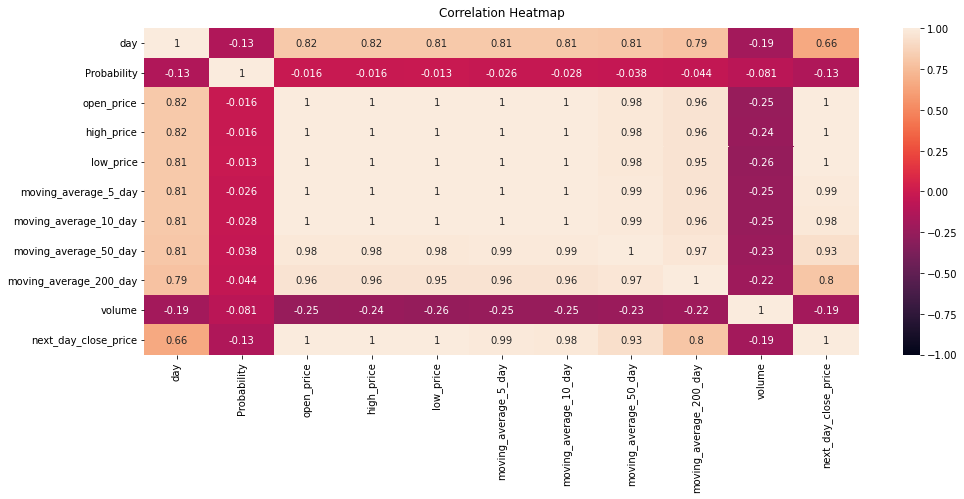

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [89]:
df.to_excel("stockdata.xlsx")

Now we will download the combined file so that we don't need to repeat the above steps again in case colabcrashes. The whole process till now took me 18 hrs

In [90]:
df_predict = df[pd.isnull(df.next_day_close_price) == True].copy()
df = df[pd.isnull(df.next_day_close_price) == False].copy()

In [91]:
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [141]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.20)

In [142]:
xtrain.head()

,day,Probability,open_price,high_price,low_price,moving_average_5_day,moving_average_10_day,moving_average_50_day,moving_average_200_day,volume
452,453,0.043315,35.53,36.16,35.49,34.89,34.38,33.07,31.12,3209200.0
455,456,-0.038320,36.30,36.36,35.79,35.75,35.05,33.25,31.21,1474500.0
209,210,-0.454657,39.78,40.00,38.97,40.07,40.70,40.54,40.25,2980400.0
288,289,-0.033126,30.70,30.80,30.54,30.57,30.17,30.95,36.98,2169000.0
37,38,-0.067914,43.70,44.09,43.47,45.03,45.36,44.59,42.28,2054600.0


In [163]:


xtest.drop(['day'], axis=1, inplace=True)


In [164]:
xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
print(xgbr)


XGBRegressor()


In [165]:
xgbr.fit(xtrain, ytrain)

[09:03:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [166]:
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9968866751049746


In [167]:
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

[09:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [168]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[09:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [169]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 0.56
RMSE: 0.75


In [170]:
from sklearn.metrics import r2_score
print("R2 score:", r2_score(ytest,ypred, multioutput='variance_weighted'))


R2 score: 0.9939506084878635


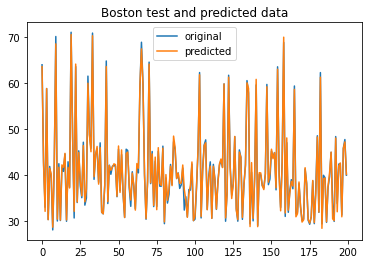

In [171]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.legend()
plt.show()

##**Hyperparameter tuning**

In [136]:
from sklearn.model_selection import RandomizedSearchCV
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=xgbr,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

random_cv.fit(xtrain,ytrain)

random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[08:47:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, learning_rate=0.05, max_depth=2,
             min_child_weight=4, n_estimators=900)

In [137]:
xgbr = xgb.XGBRegressor(base_score=0.25, learning_rate=0.05, max_depth=2,
             min_child_weight=4, n_estimators=900)

In [138]:
xgbr.fit(xtrain, ytrain)
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[08:47:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score:  0.9981426686391689
[08:47:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:lin

In [139]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 1.02
RMSE: 1.01


In [172]:
print("R2 score:", r2_score(ytest,ypred, multioutput='variance_weighted'))

R2 score: 0.9939506084878635


## **Prediction**





In [153]:

df_predict.head()


,day,Probability,open_price,high_price,low_price,moving_average_5_day,moving_average_10_day,moving_average_50_day,moving_average_200_day,volume
1000,1001,-0.238155,56.22,57.31,55.41,61.47,63.09,65.79,57.52,3853100.0
1001,1002,0.039745,56.86,60.19,56.62,59.93,62.25,65.54,57.63,4070300.0
1002,1003,-0.023462,61.60,61.71,57.18,59.41,61.84,65.33,57.73,4589500.0
1003,1004,-0.082351,58.85,59.44,57.57,58.76,61.18,65.08,57.83,2870600.0
1004,1005,-0.240679,58.10,59.64,57.89,58.45,60.65,64.85,57.92,2223900.0


In [155]:
df_predict_1 = df_predict.drop(['day'], axis=1, inplace=True)
ypred = xgbr.predict(df_predict_1)


In [156]:
ypred

array([57.352173, 57.52345 , 58.47015 , 57.53531 , 57.77338 , 57.61773 ,
       57.693367, 57.79114 , 57.770702, 57.621433, 57.758904, 57.77684 ,
       57.77421 , 57.925056, 57.737827, 57.87414 , 57.80493 , 57.4991  ,
       57.998093, 57.61779 , 57.690575, 57.45347 , 57.627605, 57.925056,
       57.80487 , 57.80493 , 57.77684 , 57.838413, 57.5996  , 57.655468,
       57.934853, 57.62095 , 57.955906, 57.598743, 58.493862, 58.004845,
       57.500076, 57.41609 , 57.738182, 57.770702, 58.147556, 59.14779 ,
       59.031242, 58.147453, 57.873207, 57.986122, 59.184883, 59.942726,
       59.524227, 60.63581 , 60.9046  , 64.118   , 61.631023, 61.650642,
       64.01906 , 64.030106, 64.31348 , 64.37799 , 61.532078, 61.47894 ,
       60.41067 , 60.859444, 61.20529 , 61.567383, 63.756886, 61.320587,
       61.16859 , 64.09891 , 63.968037, 64.09891 , 64.09891 , 64.09891 ,
       61.20529 , 60.513035, 60.536194, 63.899494, 61.48563 , 60.917557,
       64.40929 , 63.968037, 63.975674, 64.09891 , 

In [157]:
df_predict['next_day_close_price'] = ypred
df_predict.head()

,day,Probability,open_price,high_price,low_price,moving_average_5_day,moving_average_10_day,moving_average_50_day,moving_average_200_day,volume,next_day_close_price
1000,1001,-0.238155,56.22,57.31,55.41,61.47,63.09,65.79,57.52,3853100.0,57.352173
1001,1002,0.039745,56.86,60.19,56.62,59.93,62.25,65.54,57.63,4070300.0,57.523449
1002,1003,-0.023462,61.60,61.71,57.18,59.41,61.84,65.33,57.73,4589500.0,58.470150
1003,1004,-0.082351,58.85,59.44,57.57,58.76,61.18,65.08,57.83,2870600.0,57.535309
1004,1005,-0.240679,58.10,59.64,57.89,58.45,60.65,64.85,57.92,2223900.0,57.773380


In [158]:
df_predict.to_excel("stockdatapred.xlsx")

In [160]:
df_predict[['day', 'next_day_close_price']].to_csv('Teja, Alluru.csv', index=False)